**K means**
---

**THEORY**

Given a data set $D = \{\textbf{x}_1, \ldots \textbf{x}_N \}$,
we would like to classify the data set into $K$ many clusters,
grouping the points into the clusters based on similarity. 
One algorithm to do this is the K-means algorithm.

For each point $\textbf{x}_n$, we introduce the binary indicator 
$r_{nk} \in \{0,1\}$, which indicates to which cluster $\textbf{x}_n$ belongs.

$$
r_{nk} = \begin{cases}
1 & \textbf{x}_n \text{ is assigned to cluster }k \\
0 & \text{otherwise} \end{cases}	
$$

We introduce a collection of vectors $\{ \boldsymbol{\mu}_1, \ldots \boldsymbol{\mu}_K \}$,
where $\boldsymbol{\mu}_k$ is a vector that represents cluster $k$.

The loss function (which measures the squared distance of 
how far each data point $\boldsymbol{x}_n$ is away from the 
representative vector $\boldsymbol{\mu}_k$ of its cluster) is given by

$$
L = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||\textbf{x}_n - \boldsymbol{\mu}_k||_2^2
$$

We define the K-means algorithm as follows:

<ol>
    <li>
        $\textbf{Initalise:}$ Choose initial values for 
        the vectors $\{ \boldsymbol{\mu}_1, \ldots \boldsymbol{\mu}_K \}$.
    </li>
    <li>
        $\textbf{Expectation:}$ Update the cluster assignments such that each data point
        $\textbf{x}_n$ is assigned to the cluster with closest representative $\boldsymbol{\mu}_k$.
        $$
        r_{nk} := \begin{cases}
        1 & k = \text{argmin}_j ||\textbf{x}_n - \boldsymbol{\mu}_j||_2^2 \\
        0 & \text{otherwise}
        \end{cases}
        $$
    </li>
    <li>
        $\textbf{Maximisation:}$ Update the representatives $\boldsymbol{\mu}_k$ to be the average
        of all data points currently assigned to cluster $k$
        $$
        \boldsymbol{\mu}_k := \frac{\sum_{n} r_{nk} \textbf{x}_n}{\sum_n r_{nk}}  
        = \frac{\text{sum of all data points assigned to $k$}}
        {\text{number of data points assigned to $k$}}
        $$
    </li>
    <li>
        Repeat steps 2 and 3 until there are no further changes in the assignments of
        $r_{nk}$ or $\boldsymbol{\mu}_k$.
    </li>
</ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #This is for 3d scatter plots.
import math
np.random.seed(1)

First, lets create a dataset.

---
   Use np.random.multivariate_normal() to create a dataset of 400 2-dimensional samples. 
   
   This should be a 400x2 matrix.
   
   Use the matrix $\frac{1}{30} \times \begin{bmatrix}
1&0 \\
0 &1
\end{bmatrix}
$ as the covariance matrix.
   
   100 of them should have a mean of $\begin{bmatrix}
0.5&0.5
\end{bmatrix}
$
   
100 of them should have a mean of $\begin{bmatrix}
-0.5&0.5
\end{bmatrix}
$

100 of them should have a mean of $\begin{bmatrix}
0.75&-0.5
\end{bmatrix}
$

100 of them should have a mean of $\begin{bmatrix}
-0.25&-0.5
\end{bmatrix}
$

---

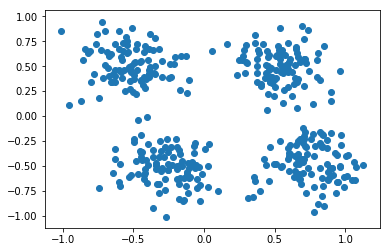

In [2]:
def generate_data():
    X = np.zeros((400, 2))
    cov = np.array([[1, 0], [0, 1]])/30.0
    mean1 = [0.5, 0.5]
    mean2 = [-0.5, 0.5]
    mean3 = [0.75, -0.5]
    mean4 = [-0.25, -0.5]
    x1 = np.random.multivariate_normal(mean1, cov, 100)
    x2 = np.random.multivariate_normal(mean2, cov, 100)
    x3 = np.random.multivariate_normal(mean3, cov, 100)
    x4 = np.random.multivariate_normal(mean4, cov, 100)
    X = np.concatenate((x1, x2,x3,x4), axis=0)
    #YOUR CODE HERE.
    return X

X = generate_data()
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
def getavg (X,start, end): 
    sums = np.zeros((len(X[0])))
    for i in range(len(sums)):
        for j in range(start, end):
            sums[i] += X[j,i]
    means = []
    for s in sums:
        m = s/(end - start)
        means.append(m)
    return means

def initialise_parameters(m, n, X):
    C = np.zeros((m, n))
    start = 0
    step = int(len(X)/m)
    end  = start + step
    for i in range(m):
        C[i,:] = getavg(X,start,end)
        start += step
        end = start + step   
    return C

C = initialise_parameters(4, 2, X)
print(C)

[[ 0.54138143  0.49757581]
 [-0.51388028  0.51195584]
 [ 0.75313445 -0.46845681]
 [-0.26127283 -0.51701145]]


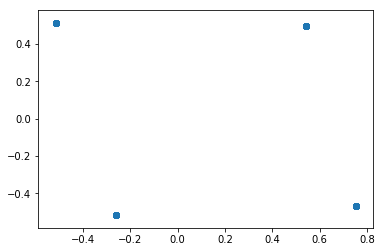

In [4]:
def E_step(C, X):
    L = np.zeros(X.shape)
    for i in range (0,len(X)):
        minimum = 1000000
        for j in range (0,len(C)):
            if (np.linalg.norm(C[j,:] - X[i,:]) <= minimum):
                minimum = np.linalg.norm(C[j,:] - X[i,:])
                index = j
        L[i,:] = C[index]
    return L

L = E_step(C, X)

plt.scatter(L[:, 0], L[:, 1])
plt.show()

In [5]:
def M_step(C, X, L):
    new_C = np.zeros(C.shape) 
    for i in range (0,len(C)):
        for j in range (0,len(C[0]) ):
            c_sum, num = 0, 0
            for k in range (0,len(X)):
                if (np.array_equal(C[i,:], L[k,:])):
                    c_sum += X[k,j]
                    num += 1
            new_C[i,j] = c_sum / num
    return new_C

print('Before:')
print(C)
print('\nAfter:')
print(M_step(C, X, L))

Before:
[[ 0.54138143  0.49757581]
 [-0.51388028  0.51195584]
 [ 0.75313445 -0.46845681]
 [-0.26127283 -0.51701145]]

After:
[[ 0.53571121  0.49638106]
 [-0.52076962  0.5158475 ]
 [ 0.75218744 -0.47678005]
 [-0.26889587 -0.51099578]]


Initial Parameters:
[[ 0.54138143  0.49757581]
 [-0.51388028  0.51195584]
 [ 0.75313445 -0.46845681]
 [-0.26127283 -0.51701145]]

Final Parameters:
[[ 0.53571121  0.49638106]
 [-0.52076962  0.5158475 ]
 [ 0.75218744 -0.47678005]
 [-0.26889587 -0.51099578]]


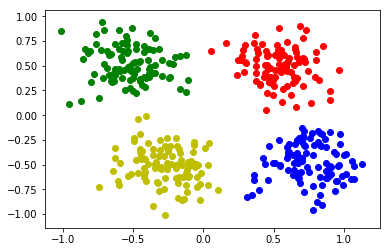

In [6]:
def kmeans(X, m, i):
    L = np.zeros(X.shape)
    C = initialise_parameters(m,len(X[0]),X)
    for j in range (0,i):
        L = E_step(C,X)
        C = M_step (C,X,L)
    return C, L

#CODE TO DISPLAY YOUR RESULTS. DO NOT MODIFY.
C_final, L_final = kmeans(X, 4, 10)
print('Initial Parameters:')
print(C)
print('\nFinal Parameters:')
print(C_final)

def allocator(X, L, c):
    cluster = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
    return np.asarray(cluster)

colours = ['r', 'g', 'b', 'y']
for i in range(4):
    cluster = allocator(X, L_final, C_final[i, :])
    plt.scatter(cluster[:,0], cluster[:,1], c=colours[i])
plt.show()

In [7]:
def kmeans_classify(C,x):
    minimum = 1000000
    for i in range (0,len(C)):
        if (np.linalg.norm(C[i,:] - x) <= minimum):
            minimum = np.linalg.norm(C[i,:] - x)
            index = i
    return C[index,:]

print(kmeans_classify(C_final,X[0]))
print(kmeans_classify(C_final,X[101]))
print(kmeans_classify(C_final,X[201]))
print(kmeans_classify(C_final,X[301]))

[0.53571121 0.49638106]
[-0.52076962  0.5158475 ]
[ 0.75218744 -0.47678005]
[-0.26889587 -0.51099578]


Above is a new dataset $Z$.

As you can see from the scatter plot, $Z$ is composed of 2 clusters; an inner clump, and an outer ring.

K-means will not be able to cluster this dataset effectively as the clusters are not linearly separable (meaning one cannot draw a straight line that separates the two clusters).

---
Add a 3rd dimension to the data in $Z$ such that the two clusters become linearly separable, then apply kmeans to separate the two clusters.

Having done so, use your two centroids to colour the two sets of samples in the 3D plot below by modifying the code below such that the inner cluster is red, and the outer cluster blue.

---

**HINT:** 
- Use the first 2 dimensions of each sample in $Z$ to compute a 3rd dimension for that sample. This means $Z \in \mathbb{R}^{800 \times 2}$ will become $Z \in \mathbb{R}^{800 \times 3}$.
- Observe how the data in Z are created in the code cell above. What 3rd dimension might help you draw a plane in 3 dimensional space between these two clusters?
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html
- You might want to use the $allocator(C, L, x)$ function above.
- Remember, your initialisation method is key to ensuring convergence.
- Use "Kernel -> Restart and Run All" if you're stuck.

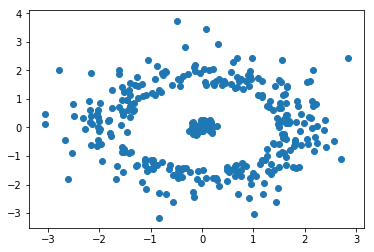

In [8]:
def gen_z():
    Z = np.random.randn(800, 2)
    for r in range(Z.shape[0]):
        s = np.linalg.norm(Z[r, :])
        Z[r, :] = Z[r, :] * (s < 0.3 or s > 1.45)
    return Z
Z = gen_z()
plt.scatter(Z[:, 0], Z[:, 1])
plt.show()

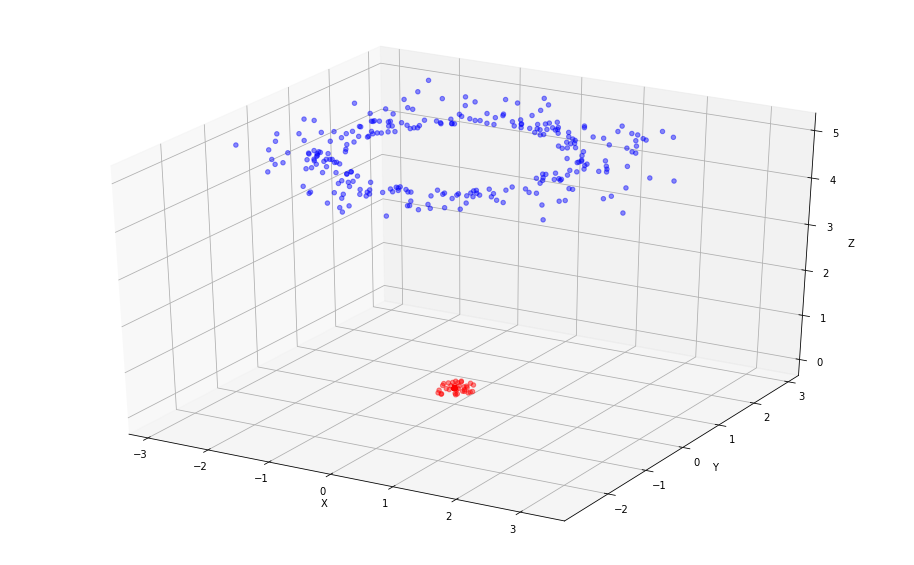

In [9]:
Z = gen_z()

new_Z = np.zeros((len(Z),len(Z[0])+1))
if (Z.shape[1] == 2):
    for i in range (0,len(Z)):
        if np.linalg.norm(Z[i, :]) >= 1.45:
            for j in range(3):
                if j == 2:
                    new_Z[i,j] = 5
                    break
                new_Z[i,j] = Z[i,j]    
        else:
            for j in range(3):
                if j == 2:
                    new_Z[i,j] = 0
                    break
                new_Z[i,j] = Z[i,j]

#DISPLAY CODE. MODIFY THIS AS YOU SEE FIT.
colours = ['r', 'b']
C_final, L_final = kmeans(new_Z, 2, 10)
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(2):
    cluster = allocator(new_Z, L_final, C_final[i, :])
    ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], c=colours[i], alpha=0.45)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# fig = plt.figure(figsize=(16, 10))
# plt.scatter(cluster[:,0], cluster[:,1])
# plt.show()